In [1]:
from warnings import simplefilter
from joblib import parallel_backend
# ignore all warnings
simplefilter(action='ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay,classification_report,precision_score,recall_score,f1_score, roc_auc_score, log_loss
import time

In [3]:
data = pd.read_csv("./archive/data/creditcard_csv.csv", true_values=["'1'"], false_values=["'0'"])

In [4]:
from sklearn import svm

def train_test_model(model,X_train,y_train,X_val,y_val, title = '_norm_'):
    # tic = time.time()
    model.fit(X_train,y_train)
    # toc = time.time()
    
    predictions = model.predict(X_val)
    
    # time_taken = toc-tic
    accuracy = np.round(accuracy_score(y_val,predictions), 3)
    precision = np.round(precision_score(y_val,predictions), 3)
    recall = np.round(recall_score(y_val,predictions), 3)
    f1 = np.round(f1_score(y_val,predictions), 3)
    # print('Time taken: ',time_taken)
    print('Test size:',len(y_val))
    print('Model Accuracy: ',accuracy)
    print('Total Precision: ',precision)
    print('Total Recall: ',recall)
    print('Total F1 Score: ',f1)
    # print('Benchmark: \% of fraudulent detections',np.count_nonzero(predictions)/492)
    # print("Classification Report:\n")
    # print(classification_report(y_val,predictions))
    # print("Area under ROC curve: ", roc_auc_score(y_val, predictions))
    print("Log loss: ", log_loss(y_val, predictions))
    print("Confusion Matrix:\n")
    ConfusionMatrixDisplay.from_estimator(model,X_val,y_val, display_labels=['Normal', 'Fraud'], colorbar=False)
    plt.savefig(title + '_CF.png')
    plt.show()
    print("ROC curve:\n")
    RocCurveDisplay.from_estimator(model,X_val,y_val)
    plt.show()

In [5]:
labels = np.float64(data['Class'].values)
features = data.drop("Class", axis=1).to_numpy()

# train_features,  temp_features, train_labels, temp_labels = train_test_split(features, labels, train_size=0.7)

# val_features, test_features, val_labels, test_labels = train_test_split(temp_features, temp_labels, train_size=0.5)
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, train_size=0.7)

In [6]:
print("No.of Transactions labeled fraudulent:", np.count_nonzero(labels))

No.of Transactions labeled fraudulent: 492


In [7]:
np.count_nonzero(train_labels)

352

In [8]:
np.count_nonzero(val_labels)

140

Test size: 85443
Model Accuracy:  0.998
Total Precision:  0.0
Total Recall:  0.0
Total F1 Score:  0.0
Log loss:  0.059058219801229134
Confusion Matrix:



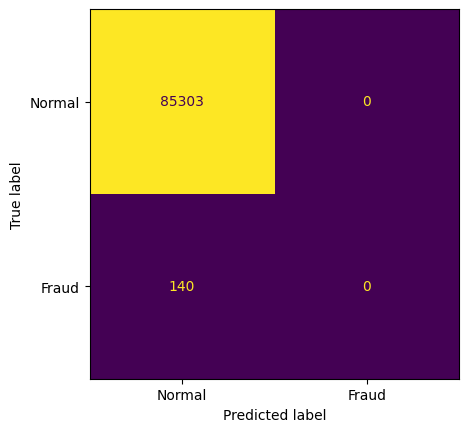

ROC curve:



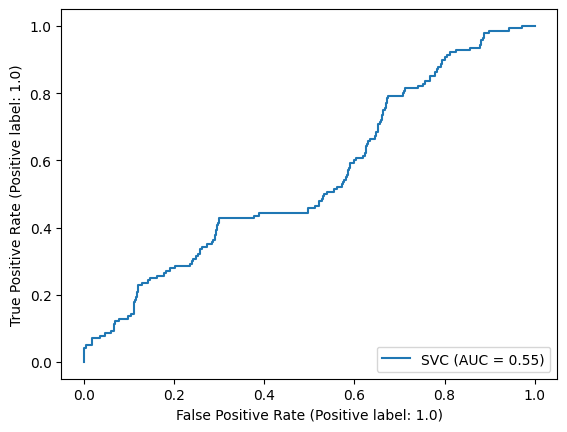

In [9]:
with parallel_backend('threading', n_jobs=2):
    train_test_model(svm.SVC(), train_features, train_labels, val_features, val_labels, title = 'SVM')

Test size: 85443
Model Accuracy:  0.999
Total Precision:  0.909
Total Recall:  0.143
Total F1 Score:  0.247
Log loss:  0.05146502011249969
Confusion Matrix:



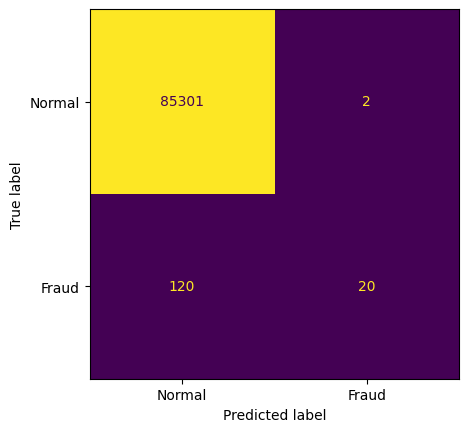

ROC curve:



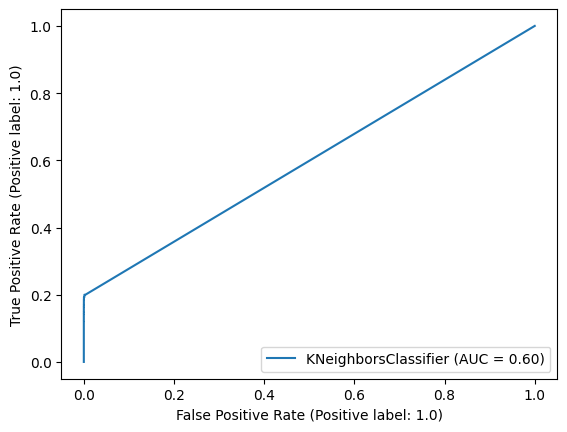

In [16]:
from sklearn.neighbors import KNeighborsClassifier
train_test_model(KNeighborsClassifier(weights='distance'), train_features, train_labels, val_features, val_labels, title = 'KNN')

Accuracy is 99%

BUT other metrics such as precision recall and F1-score are 0 $\implies$ the SVM classifier is just labelling everything as 0 (normal)

In [11]:
# ### SCALING THE FEATURES as features like amount and time elapsed are not in the same scale as other features

# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features)
# val_features = scaler.transform(val_features)
# test_features = scaler.transform(test_features)

Test size: 85443
Model Accuracy:  0.998
Total Precision:  0.0
Total Recall:  0.0
Total F1 Score:  0.0
Log loss:  0.059058219801229134
Confusion Matrix:



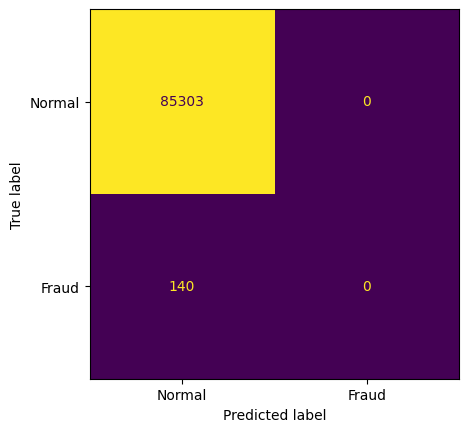

ROC curve:



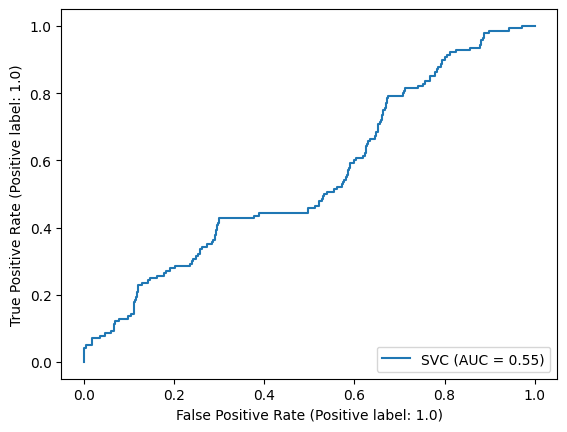

In [12]:
### SVM with scaled features
train_test_model(svm.SVC(), train_features, train_labels, val_features, val_labels, title = 'SVM_norm')

### K-Nearest Neighbors with scaled features
train_test_model(KNeighborsClassifier(weights='distance'), train_features, train_labels, val_features, val_labels, title = 'KNN_norm')

Now the ROC curve looks much better, the recall and other metrics are non-zero.

This is because, after normalizing, all the features have the same range hence, distance based classifiers such as SVM and KNN are able to distinguish between the classes.

Test size: 85443
Model Accuracy:  0.993
Total Precision:  0.141
Total Recall:  0.643
Total F1 Score:  0.232
Log loss:  0.2518411230095264
Confusion Matrix:



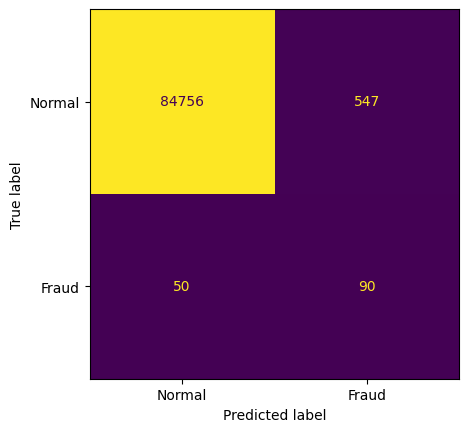

ROC curve:



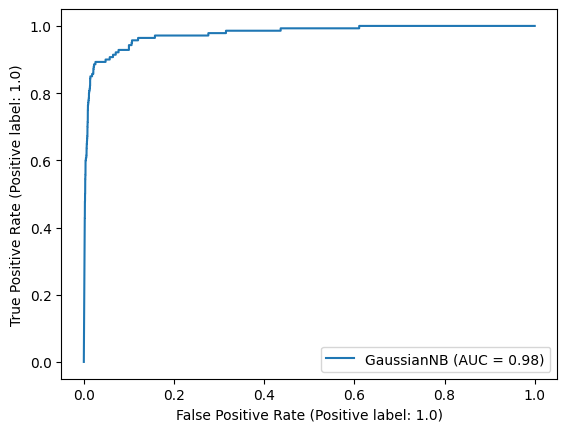

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

train_test_model(gnb, train_features, train_labels, val_features, val_labels, title = 'GNB_norm')

Test size: 85443
Model Accuracy:  0.999
Total Precision:  0.608
Total Recall:  0.686
Total F1 Score:  0.644
Log loss:  0.04471550927807353
Confusion Matrix:



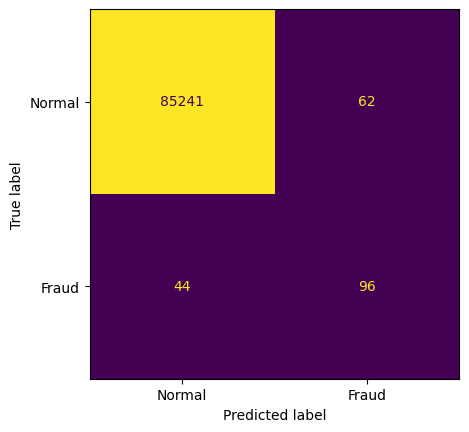

ROC curve:



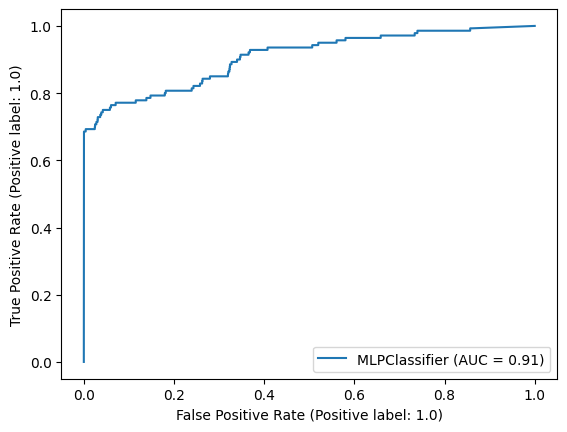

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu')

train_test_model(mlp, train_features, train_labels, val_features, val_labels, title = 'MLP_norm')

Test size: 85443
Model Accuracy:  0.999
Total Precision:  0.672
Total Recall:  0.629
Total F1 Score:  0.649
Log loss:  0.040075220579405546
Confusion Matrix:



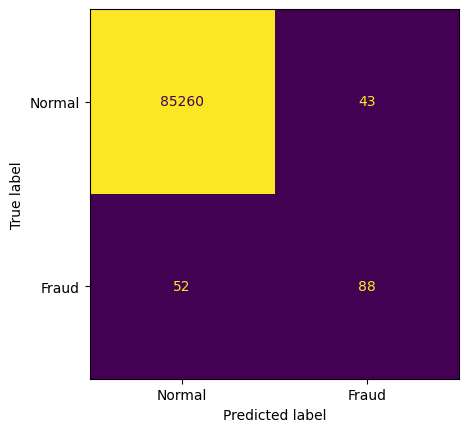

ROC curve:



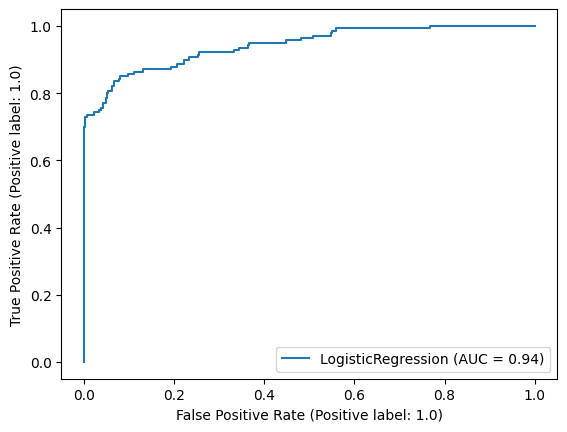

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
train_test_model(log_reg, train_features, train_labels, val_features, val_labels, title = 'LogR_norm')

Yet only $~10\%$ of the fraudulent transactions are flagged as fraudulent.


This is because of the imbalance in the dataset